In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
from tqdm import tqdm

In [2]:
%matplotlib inline

In [3]:
search_result = lk.search_targetpixelfile('TIC_465088681')
search_result


#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 12,2019,SPOC,120,465088681,0.0
1,TESS Sector 12,2019,TESS-SPOC,1800,465088681,0.0
2,TESS Sector 39,2021,SPOC,120,465088681,0.0
3,TESS Sector 39,2021,TESS-SPOC,600,465088681,0.0
4,TESS Sector 66,2023,SPOC,120,465088681,0.0


In [11]:
tpf = search_result[3].download()

In [5]:
tpf

TessTargetPixelFile(TICID: 465088681)

<Axes: title={'center': 'Target ID: 465088681, Cadence: 163342'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

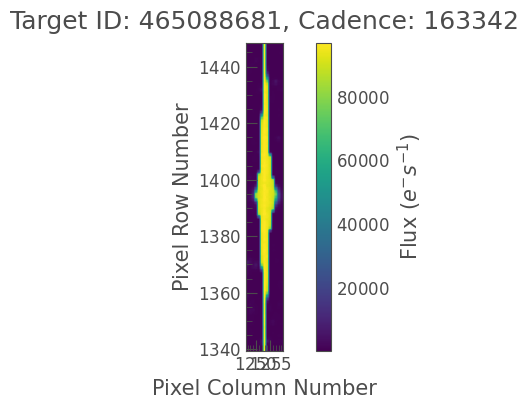

In [12]:
tpf.plot()

<Axes: title={'center': 'Target ID: 465088681, Cadence: 163342'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

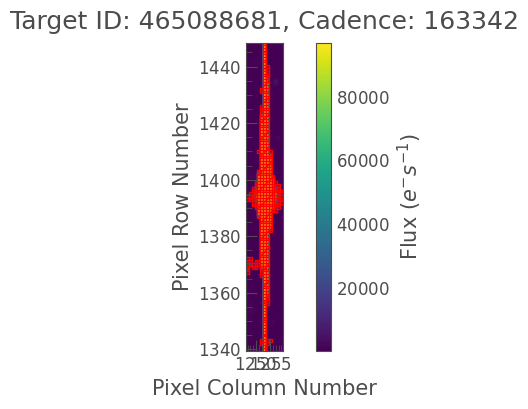

In [14]:
# tpf.plot(frame=-1,aperture_mask='threshold')
tpf.plot(frame = 0, aperture_mask='threshold')
plt.y_axis()

In [11]:
# print(len(lc2))
"""lines jump at end, cut off"""
lc = tpf.to_lightcurve(aperture_mask='pipeline')[0:17500]
lc2 = tpf.to_lightcurve(aperture_mask='threshold')[0:17500] # remove outliers
ax = lc.normalize().plot()
lc2.normalize().plot(ax=ax,label='threshold')
# count = 0
# for i in lc:
#     if lc[i] > lc2[i]:
#         count +=1
# print(count)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
custom_mask = np.zeros((tpf[0].shape[1:]), dtype='bool')
""" what does this do? """
# tpf.plot(frame=-1,aperture_mask='threshold')
tpf.plot(frame=0,aperture_mask='threshold')

In [12]:
tpf.plot_pixels(aperture_mask='threshold')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
print(tpf[0].shape[1:])

In [ ]:
""" if light is above the threshold (or change in light?), black line """
ThreshMask = tpf.create_threshold_mask()
plt.figure(figsize=(35,30))
fig, axs = plt.subplots(25,25)
for i in range(25):
    for j in range(25):

        custom_mask = np.zeros((tpf[0].shape[1:]), dtype='bool')
        custom_mask[i,j] = True
        if ThreshMask[i,j] == True:
            LineColor = 'black'
        else:
            LineColor = 'blue'
        tpf.to_lightcurve(aperture_mask=custom_mask).plot(ax=axs[i,j],label=None,xlabel='',ylabel='',color=LineColor)
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])

In [ ]:
""" if light is above the threshold (or change in light?), black line """
"""trying to get an excerpt/section of plot above"""
ThreshMask = tpf.create_threshold_mask()
plt.figure(figsize=(35,30))
fig, axs = plt.subplots(13,13)
for i in range(12,13):
    for j in range(12,13):

        custom_mask = np.zeros((tpf[0].shape[1:]), dtype='bool')
        custom_mask[i,j] = True
        if ThreshMask[i,j] == True:
            LineColor = 'black'
        else:
            LineColor = 'blue'
        tpf.to_lightcurve(aperture_mask=custom_mask).plot(ax=axs[i,j],label=None,xlabel='',ylabel='',color=LineColor)
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])

<Axes: title={'center': 'Target ID: 465088681, Cadence: 19081'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

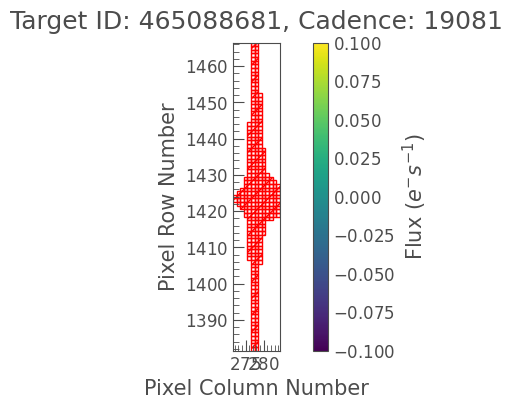

In [9]:
tpf2 = search_result[1].download()
tpf.plot(aperture_mask='threshold')

In [10]:
lc_2 = tpf2.to_lightcurve(aperture_mask='pipeline')
lc2_2 = tpf2.to_lightcurve(aperture_mask='threshold')
ax_2 = lc_2.normalize().plot()
lc2_2.normalize().plot(ax=ax_2,label='threshold')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
print(tpf2[0].shape[1:]) 
# custom_mask2 = np.zeros((tpf2[0].shape[1:]), dtype='bool')
#index 14 is out of bounds for axis 1 with size 14

In [ ]:
ThreshMask = tpf2.create_threshold_mask()
plt.figure(figsize=(35,30))
fig, axs = plt.subplots(14,14)
for i in range(14):
    for j in range(14):

        custom_mask2 = np.zeros((tpf2[0].shape[1:]), dtype='bool')
        custom_mask2[i,j] = True
        if ThreshMask[i,j] == True:
            LineColor = 'black'
        else:
            LineColor = 'blue'
        tpf2.to_lightcurve(aperture_mask=custom_mask2).plot(ax=axs[i,j],label=None,xlabel='',ylabel='',color=LineColor)
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])

In [ ]:
tpf2.plot_pixels(aperture_mask='threshold')